In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal


In [3]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [4]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

model = make_pipeline(StandardScaler(),Ridge(alpha=0))
cv_results = cross_validate(model, data_numerical, target,
                            cv=10,
                            return_estimator=True)

C:\Users\sorok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.49347e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\sorok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.64526e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [13]:
import pandas as pd
results = pd.DataFrame(cv_results)
results

,fit_time,score_time,estimator,test_score
0,0.017012,0.000990,"(StandardScaler(), Ridge(alpha=0))",0.755394
1,0.004999,0.001998,"(StandardScaler(), Ridge(alpha=0))",0.794119
2,0.005000,0.001000,"(StandardScaler(), Ridge(alpha=0))",0.819849
3,0.005998,0.001009,"(StandardScaler(), Ridge(alpha=0))",0.663944
4,0.004990,0.001009,"(StandardScaler(), Ridge(alpha=0))",0.803640
5,0.002991,0.001009,"(StandardScaler(), Ridge(alpha=0))",0.768688
6,0.002995,0.000998,"(StandardScaler(), Ridge(alpha=0))",0.756351
7,0.006998,0.000000,"(StandardScaler(), Ridge(alpha=0))",0.721832
8,0.003991,0.001010,"(StandardScaler(), Ridge(alpha=0))",0.316960
9,0.004990,0.001010,"(StandardScaler(), Ridge(alpha=0))",0.729999


In [7]:
# model_first_fold = cv_results["estimator"][0]

In [14]:
'''feature_names = model_first_fold[0].get_feature_names_out(
    input_features=data_numerical.columns)
feature_names'''

array(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal'], dtype=object)

In [17]:
import pandas as pd

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)

In [19]:
coefs.describe().loc[['min', 'max']]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-3132.330756,-124.590613,4386.005178,-5.168321e+18,-1.767595e+18,-4.938164e+18,-1.030006e+19,-3.305951e+18,-3.815637e+18,-4.366393e+17,...,1770.949263,12792.453037,-7908.548914,3631.644558,1057.336648,-5901.854532,60.244808,-2198.533358,-2980.948895,-1233.061113
max,2780.788333,4933.658316,10538.818753,1.064385e+19,3.803673e+18,1.030395e+19,4.967323e+18,5.390428e+18,6.086820e+18,6.939415e+17,...,7253.542064,23395.827033,4677.480186,6078.618809,2742.935325,-529.687789,2271.955189,2321.040351,349.335397,959.205638


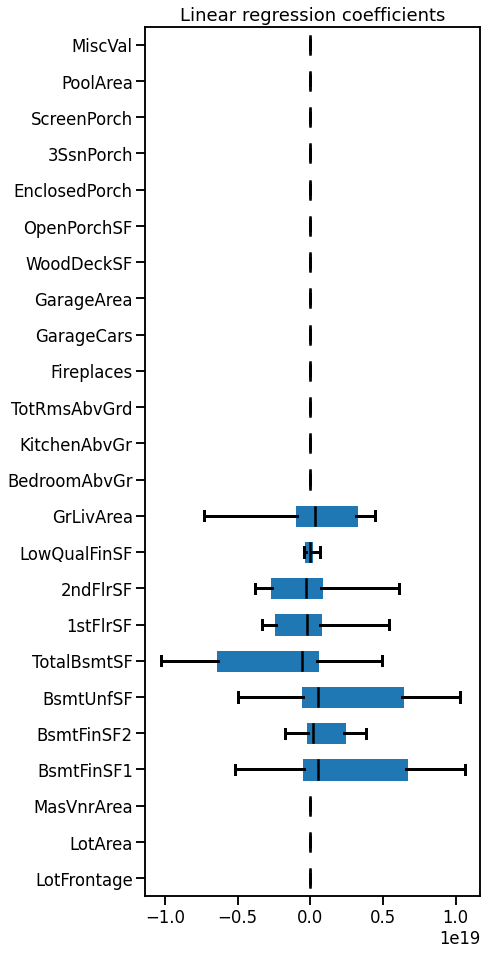

In [20]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge coefficients")

### Task 2

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

model = make_pipeline(StandardScaler(),Ridge(alpha=1.0))
cv_results = cross_validate(model, data_numerical, target,
                            cv=10,
                            return_estimator=True)
results = pd.DataFrame(cv_results)
results

,fit_time,score_time,estimator,test_score
0,0.004002,0.000998,"(StandardScaler(), Ridge())",0.761415
1,0.003001,0.001012,"(StandardScaler(), Ridge())",0.806418
2,0.002998,0.001001,"(StandardScaler(), Ridge())",0.811895
3,0.003014,0.000985,"(StandardScaler(), Ridge())",0.666047
4,0.001989,0.001009,"(StandardScaler(), Ridge())",0.799548
5,0.002998,0.001000,"(StandardScaler(), Ridge())",0.768840
6,0.001993,0.001000,"(StandardScaler(), Ridge())",0.756386
7,0.002999,0.001000,"(StandardScaler(), Ridge())",0.718204
8,0.003033,0.000000,"(StandardScaler(), Ridge())",0.315061
9,0.002002,0.000997,"(StandardScaler(), Ridge())",0.786404


In [22]:
import pandas as pd

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)

In [23]:
coefs.describe().loc[['min', 'max']]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1014.941352,493.591270,6145.027307,7862.001820,-658.039034,2228.213769,10673.168368,7710.687901,11239.374795,-2770.569902,...,2145.052452,11610.344076,-3183.723296,3287.994032,1493.838234,-3391.962390,32.95300,740.771764,-2419.756875,-1050.602603
max,2813.950135,2601.096893,7822.622938,11098.319437,358.820285,4175.634363,15693.414764,11243.005735,13642.435186,-1280.035931,...,3758.486675,22562.769198,4626.005696,5791.918839,3030.459490,-2102.823437,1697.85694,2172.624444,71.092558,607.322413


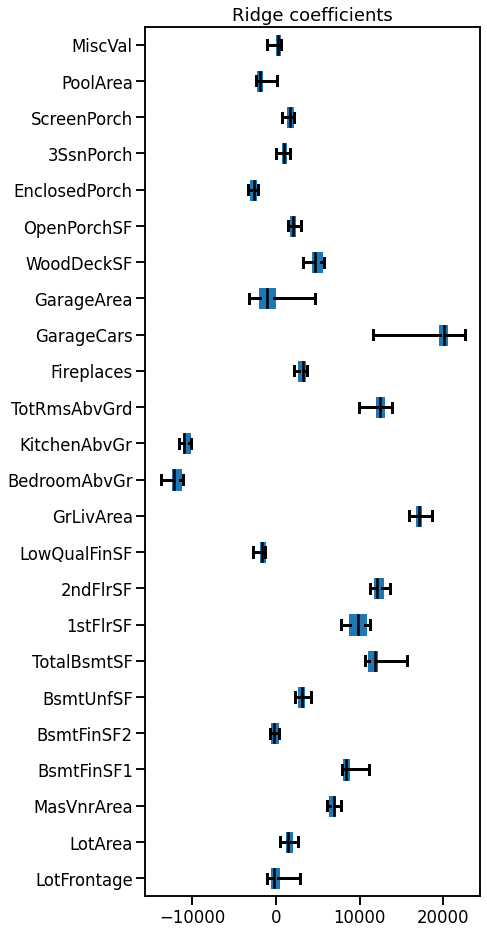

In [24]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge coefficients")

In [26]:
coefs.describe().loc[['mean']].max

<bound method NDFrame._add_numeric_operations.<locals>.max of       LotFrontage      LotArea   MasVnrArea   BsmtFinSF1  BsmtFinSF2  \
mean    62.008411  1508.092126  6862.664154  8574.144931 -198.540154   

        BsmtUnfSF   TotalBsmtSF     1stFlrSF      2ndFlrSF  LowQualFinSF  ...  \
mean  3078.259716  11947.838543  9701.912155  12201.988699  -1718.353818  ...   

       Fireplaces    GarageCars  GarageArea   WoodDeckSF  OpenPorchSF  \
mean  3087.058747  19417.910189 -725.555479  4763.085964  2095.684415   

      EnclosedPorch   3SsnPorch  ScreenPorch     PoolArea     MiscVal  
mean     -2735.3187  943.744522  1634.099935 -1764.633609  147.261815  

[1 rows x 24 columns]>

### Question 4

In [27]:
numerical_features_4 = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical_4 = data[numerical_features_4]

In [28]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

model4 = make_pipeline(StandardScaler(),Ridge(alpha=1.0))
cv_results4 = cross_validate(model4, data_numerical_4, target,
                            cv=10,
                            return_estimator=True)
results4 = pd.DataFrame(cv_results4)
results4

,fit_time,score_time,estimator,test_score
0,0.003987,0.000999,"(StandardScaler(), Ridge())",0.762986
1,0.003012,0.000999,"(StandardScaler(), Ridge())",0.808528
2,0.003000,0.001000,"(StandardScaler(), Ridge())",0.811959
3,0.002990,0.001000,"(StandardScaler(), Ridge())",0.667190
4,0.003001,0.001032,"(StandardScaler(), Ridge())",0.799703
5,0.002965,0.000000,"(StandardScaler(), Ridge())",0.773605
6,0.002307,0.001045,"(StandardScaler(), Ridge())",0.756416
7,0.002014,0.000984,"(StandardScaler(), Ridge())",0.718090
8,0.002965,0.000000,"(StandardScaler(), Ridge())",0.328853
9,0.002001,0.001007,"(StandardScaler(), Ridge())",0.786354


In [42]:
import pandas as pd

coefs4 = [est[-1].coef_ for est in cv_results4["estimator"]]
coefs4 = pd.DataFrame(coefs4, columns=numerical_features_4)

In [43]:
coefs4.describe().loc[['mean']].max

<bound method NDFrame._add_numeric_operations.<locals>.max of       LotFrontage     LotArea  MasVnrArea   BsmtFinSF1  BsmtFinSF2  \
mean    19.513734  1498.96754  6844.98372  8537.873135 -197.549246   

        BsmtUnfSF   TotalBsmtSF     1stFlrSF      2ndFlrSF  LowQualFinSF  ...  \
mean  3088.973049  11920.702433  9652.195672  12193.817284  -1721.808665  ...   

      TotRmsAbvGrd   Fireplaces    GarageCars   WoodDeckSF  OpenPorchSF  \
mean  12176.413406  3134.199017  18837.624639  4758.777609  2072.478059   

      EnclosedPorch   3SsnPorch  ScreenPorch     PoolArea    MiscVal  
mean   -2746.834573  947.049886  1629.835272 -1779.135267  137.50539  

[1 rows x 23 columns]>

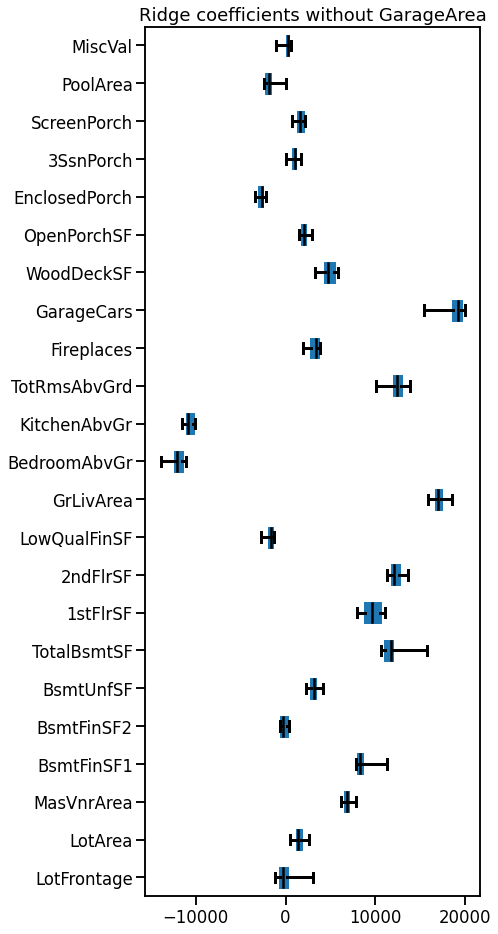

In [44]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs4.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge coefficients without GarageArea")

In [45]:
print(f"Std before removing: {coefs[['GarageCars']].std()} and after removing GarageArea: {coefs4[['GarageCars']].std()}. Difference = {coefs[['GarageCars']].std() - coefs4[['GarageCars']].std()}")

Std before removing: GarageCars    2895.287646
dtype: float64 and after removing GarageArea: GarageCars    1305.139394
dtype: float64. Difference = GarageCars    1590.148252
dtype: float64


### Question 6

In [46]:
# Drop column GarageArea for Question 6
column_to_drop = "GarageArea"
data_numerical = data_numerical.drop(columns=column_to_drop)

In [48]:
import numpy as np
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-3, 3, num=101)
model = make_pipeline(StandardScaler(),RidgeCV(alphas=alphas, store_cv_values=True))
cv_results = cross_validate(model, data_numerical, target,
                            cv=10,
                            return_estimator=True)
results = pd.DataFrame(cv_results)
results

,fit_time,score_time,estimator,test_score
0,0.031999,0.001009,"(StandardScaler(), RidgeCV(alphas=array([1.000...",0.767615
1,0.026993,0.001009,"(StandardScaler(), RidgeCV(alphas=array([1.000...",0.796449
2,0.025987,0.001012,"(StandardScaler(), RidgeCV(alphas=array([1.000...",0.804622
3,0.026990,0.001005,"(StandardScaler(), RidgeCV(alphas=array([1.000...",0.674943
4,0.026991,0.001010,"(StandardScaler(), RidgeCV(alphas=array([1.000...",0.776622
5,0.026003,0.000998,"(StandardScaler(), RidgeCV(alphas=array([1.000...",0.762680
6,0.025991,0.001009,"(StandardScaler(), RidgeCV(alphas=array([1.000...",0.754177
7,0.024991,0.001001,"(StandardScaler(), RidgeCV(alphas=array([1.000...",0.709086
8,0.024998,0.001010,"(StandardScaler(), RidgeCV(alphas=array([1.000...",0.345969
9,0.024991,0.001009,"(StandardScaler(), RidgeCV(alphas=array([1.000...",0.793961


In [50]:
coefsridgeCV = [est[-1].coef_ for est in results["estimator"]]
coefsridgeCV = pd.DataFrame(coefsridgeCV, columns=numerical_features_4)

In [51]:
print(f'Std for GarageCars: {coefsridgeCV["GarageCars"].std()}')

Std for GarageCars: 587.5476658334509


In [53]:
print(f"Std before tuning: {coefs4['GarageCars'].std()} and after tuning: {coefsridgeCV['GarageCars'].std()}. Difference = {coefs4['GarageCars'].std() - coefsridgeCV['GarageCars'].std()}")

Std before tuning: 1305.139394188688 and after tuning: 587.5476658334509. Difference = 717.591728355237


In [49]:
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas

,0.001000,0.001148,0.001318,0.001514,0.001738,0.001995,0.002291,0.002630,0.003020,0.003467,...,288.403150,331.131121,380.189396,436.515832,501.187234,575.439937,660.693448,758.577575,870.963590,1000.000000
0,2.057659e+09,2.057659e+09,2.057658e+09,2.057658e+09,2.057658e+09,2.057658e+09,2.057658e+09,2.057658e+09,2.057658e+09,2.057657e+09,...,1.994265e+09,1.993799e+09,1.994742e+09,1.997450e+09,2.002324e+09,2.009814e+09,2.020427e+09,2.034723e+09,2.053323e+09,2.076910e+09
1,2.060857e+09,2.060857e+09,2.060857e+09,2.060857e+09,2.060857e+09,2.060857e+09,2.060856e+09,2.060856e+09,2.060856e+09,2.060856e+09,...,1.992604e+09,1.991692e+09,1.992151e+09,1.994329e+09,1.998620e+09,2.005463e+09,2.015350e+09,2.028826e+09,2.046491e+09,2.069004e+09
2,2.040025e+09,2.040025e+09,2.040025e+09,2.040025e+09,2.040025e+09,2.040025e+09,2.040024e+09,2.040024e+09,2.040024e+09,2.040024e+09,...,1.981525e+09,1.981643e+09,1.983183e+09,1.986480e+09,1.991915e+09,1.999910e+09,2.010936e+09,2.025517e+09,2.044231e+09,2.067713e+09
3,1.928657e+09,1.928657e+09,1.928657e+09,1.928657e+09,1.928657e+09,1.928657e+09,1.928657e+09,1.928656e+09,1.928656e+09,1.928656e+09,...,1.864024e+09,1.863617e+09,1.864630e+09,1.867410e+09,1.872347e+09,1.879879e+09,1.890497e+09,1.904746e+09,1.923229e+09,1.946614e+09
4,1.958904e+09,1.958903e+09,1.958903e+09,1.958903e+09,1.958903e+09,1.958903e+09,1.958903e+09,1.958903e+09,1.958902e+09,1.958902e+09,...,1.898380e+09,1.897850e+09,1.898640e+09,1.901085e+09,1.905561e+09,1.912490e+09,1.922343e+09,1.935642e+09,1.952962e+09,1.974932e+09
5,2.044161e+09,2.044160e+09,2.044160e+09,2.044160e+09,2.044160e+09,2.044160e+09,2.044160e+09,2.044160e+09,2.044159e+09,2.044159e+09,...,1.977293e+09,1.976591e+09,1.977283e+09,1.979714e+09,1.984273e+09,1.991393e+09,2.001558e+09,2.015303e+09,2.033221e+09,2.055965e+09
6,2.030978e+09,2.030978e+09,2.030978e+09,2.030978e+09,2.030978e+09,2.030977e+09,2.030977e+09,2.030977e+09,2.030977e+09,2.030977e+09,...,1.971779e+09,1.971788e+09,1.973220e+09,1.976416e+09,1.981760e+09,1.989684e+09,2.000667e+09,2.015242e+09,2.033998e+09,2.057587e+09
7,2.007753e+09,2.007753e+09,2.007753e+09,2.007753e+09,2.007753e+09,2.007753e+09,2.007753e+09,2.007752e+09,2.007752e+09,2.007752e+09,...,1.950385e+09,1.950330e+09,1.951672e+09,1.954761e+09,1.959994e+09,1.967817e+09,1.978734e+09,1.993303e+09,2.012146e+09,2.035947e+09
8,1.377586e+09,1.377586e+09,1.377586e+09,1.377586e+09,1.377586e+09,1.377586e+09,1.377585e+09,1.377585e+09,1.377585e+09,1.377585e+09,...,1.397158e+09,1.404795e+09,1.414200e+09,1.425669e+09,1.439536e+09,1.456184e+09,1.476046e+09,1.499613e+09,1.527444e+09,1.560168e+09
9,2.088958e+09,2.088958e+09,2.088958e+09,2.088958e+09,2.088958e+09,2.088958e+09,2.088958e+09,2.088957e+09,2.088957e+09,2.088957e+09,...,2.021654e+09,2.020800e+09,2.021296e+09,2.023485e+09,2.027753e+09,2.034537e+09,2.044325e+09,2.057663e+09,2.075159e+09,2.097483e+09


In [55]:
for est in results["estimator"]:
    print(est.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('ridgecv', RidgeCV(alphas=array([1.00000000e-03, 1.14815362e-03, 1.31825674e-03, 1.51356125e-03,
       1.73780083e-03, 1.99526231e-03, 2.29086765e-03, 2.63026799e-03,
       3.01995172e-03, 3.46736850e-03, 3.98107171e-03, 4.57088190e-03,
       5.24807460e-03, 6.02559586e-03, 6.91830971e-03, 7.94328235e-03,
       9.12010839e-03, 1.04712855e-02, 1.20226443e-02, 1.38038426e-02,
       1.58489319e-02, 1.81970086e-0...
       3.63078055e+01, 4.16869383e+01, 4.78630092e+01, 5.49540874e+01,
       6.30957344e+01, 7.24435960e+01, 8.31763771e+01, 9.54992586e+01,
       1.09647820e+02, 1.25892541e+02, 1.44543977e+02, 1.65958691e+02,
       1.90546072e+02, 2.18776162e+02, 2.51188643e+02, 2.88403150e+02,
       3.31131121e+02, 3.80189396e+02, 4.36515832e+02, 5.01187234e+02,
       5.75439937e+02, 6.60693448e+02, 7.58577575e+02, 8.70963590e+02,
       1.00000000e+03]),
        store_cv_values=True))], 'verbose': False, 'standardsc

In [57]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 63.0957344480193,
 331.13112148259074]

### Question 8

In [119]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [120]:
from sklearn.linear_model import LogisticRegression
import sklearn
sklearn.set_config(display="diagram")
linear_model = make_pipeline(StandardScaler(), LogisticRegression())
linear_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [121]:
cv_results = cross_validate(linear_model, data, target,
                            cv=10,
                            return_estimator=True)
results = pd.DataFrame(cv_results)
results

,fit_time,score_time,estimator,test_score
0,0.054979,0.004998,"(StandardScaler(), LogisticRegression())",0.798567
1,0.056013,0.004993,"(StandardScaler(), LogisticRegression())",0.792835
2,0.056006,0.005009,"(StandardScaler(), LogisticRegression())",0.796683
3,0.056008,0.005000,"(StandardScaler(), LogisticRegression())",0.804873
4,0.058000,0.005008,"(StandardScaler(), LogisticRegression())",0.800369
5,0.055017,0.004984,"(StandardScaler(), LogisticRegression())",0.799140
6,0.056005,0.005003,"(StandardScaler(), LogisticRegression())",0.797502
7,0.057014,0.005000,"(StandardScaler(), LogisticRegression())",0.799345
8,0.056999,0.004009,"(StandardScaler(), LogisticRegression())",0.805078
9,0.055004,0.005001,"(StandardScaler(), LogisticRegression())",0.804054


In [67]:
i=9
results.loc[i, 'test_score']

0.8040540540540541

In [71]:
target.value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

In [68]:
target.head()

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: class, dtype: object

In [74]:
from sklearn.dummy import DummyClassifier
to_predict = ' <=50K'
dummy_model = DummyClassifier(strategy='constant', constant=to_predict)
dummy_model

DummyClassifier(constant=' <=50K', strategy='constant')

In [75]:
cv_results = cross_validate(dummy_model, data, target,
                            cv=10,
                            return_estimator=True)
results_dummy = pd.DataFrame(cv_results)
results_dummy

,fit_time,score_time,estimator,test_score
0,0.010000,0.004998,"DummyClassifier(constant=' <=50K', strategy='c...",0.760696
1,0.010002,0.004998,"DummyClassifier(constant=' <=50K', strategy='c...",0.760696
2,0.012004,0.010000,"DummyClassifier(constant=' <=50K', strategy='c...",0.760852
3,0.012997,0.003999,"DummyClassifier(constant=' <=50K', strategy='c...",0.760852
4,0.009001,0.004999,"DummyClassifier(constant=' <=50K', strategy='c...",0.760852
5,0.009999,0.004999,"DummyClassifier(constant=' <=50K', strategy='c...",0.760647
6,0.009999,0.004002,"DummyClassifier(constant=' <=50K', strategy='c...",0.760647
7,0.008996,0.004001,"DummyClassifier(constant=' <=50K', strategy='c...",0.760647
8,0.008998,0.004002,"DummyClassifier(constant=' <=50K', strategy='c...",0.760647
9,0.010000,0.004039,"DummyClassifier(constant=' <=50K', strategy='c...",0.760647


In [79]:
dummy_win, linear_win = 0, 0
for i in range(0,10):
    if results.loc[i, 'test_score'] > results_dummy.loc[i, 'test_score']:
        linear_win = linear_win + 1
    else:
        dummy_win = dummy_win + 1
print(f"Linear model is {linear_win} times better than DummyClassifier, "
       f"DummyClassifier is {dummy_win} times better than Linear Model" )

Linear model is 10 times better than DummyClassifier, DummyClassifier is 0 times better than Linear Model


In [112]:
import pandas as pd
column_names = data.columns.values.tolist()
# column_names
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
# coefsFrame = pd.DataFrame(coefs, data.columns) #column_names)
coefs

[array([[0.52204276, 2.4667774 , 0.30602977, 0.53963505]]),
 array([[0.52606692, 2.40653282, 0.30817766, 0.54182433]]),
 array([[0.52425661, 2.45592287, 0.30812359, 0.54384342]]),
 array([[0.52037496, 2.45048201, 0.30916996, 0.53459728]]),
 array([[0.51925928, 2.51201042, 0.30424291, 0.54671495]]),
 array([[0.52173216, 2.4416315 , 0.30401707, 0.54128619]]),
 array([[0.52023528, 2.47372277, 0.30689298, 0.53637405]]),
 array([[0.52395804, 2.44532129, 0.30832579, 0.53825271]]),
 array([[0.51645436, 2.40508701, 0.30839363, 0.53512121]]),
 array([[0.51673694, 2.45048914, 0.30139428, 0.53553169]])]

### Question 11

In [126]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [127]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [128]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [129]:
numerical_columns

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [130]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [131]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [132]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [134]:
cv_results = cross_validate(model, data, target,
                            cv=10,
                            return_estimator=True)
results_alldata = pd.DataFrame(cv_results)
results_alldata

,fit_time,score_time,estimator,test_score
0,0.723098,0.010007,(ColumnTransformer(transformers=[('one-hot-enc...,0.852610
1,0.673081,0.010009,(ColumnTransformer(transformers=[('one-hot-enc...,0.850768
2,0.608078,0.010006,(ColumnTransformer(transformers=[('one-hot-enc...,0.850123
3,0.685083,0.011002,(ColumnTransformer(transformers=[('one-hot-enc...,0.848894
4,0.614076,0.010003,(ColumnTransformer(transformers=[('one-hot-enc...,0.848894
5,0.799106,0.010001,(ColumnTransformer(transformers=[('one-hot-enc...,0.846642
6,0.655118,0.010000,(ColumnTransformer(transformers=[('one-hot-enc...,0.854832
7,0.656053,0.011000,(ColumnTransformer(transformers=[('one-hot-enc...,0.851147
8,0.673122,0.010002,(ColumnTransformer(transformers=[('one-hot-enc...,0.858722
9,0.915143,0.010967,(ColumnTransformer(transformers=[('one-hot-enc...,0.852375


In [135]:
alldata_win, linear_win = 0, 0
for i in range(0,10):
    if results.loc[i, 'test_score'] > results_alldata.loc[i, 'test_score']:
        linear_win = linear_win + 1
    else:
        alldata_win = alldata_win + 1
print(f"Linear model is {linear_win} times better than AllData Classifier, "
       f"AllData Classifier is {alldata_win} times better than Linear Model" )

Linear model is 0 times better than AllData Classifier, AllData Classifier is 10 times better than Linear Model


In [136]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_['one-hot-encoder']
                             .get_feature_names_out(categorical_columns)).tolist()
feature_names += numerical_columns
feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Fa

In [137]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]

In [170]:
coefs[0].shape

(1, 106)

In [140]:
len(feature_names)

106

In [141]:
coef_weight = pd.DataFrame(coefs, columns=feature_names)

C:\Users\sorok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


ValueError: could not broadcast input array from shape (106,) into shape (1,)

In [142]:
list_of_estimators_all = [pipeline[-1] for pipeline in cv_results["estimator"]]                                                 
list_of_coefficients_new = [estimator.coef_[0] for estimator in list_of_estimators_all]                                                                
list_of_coefficients_new[7].shape

(105,)

In [143]:
pd.DataFrame(list_of_coefficients_new).shape

(10, 106)

In [144]:
coef_weight = pd.DataFrame(list_of_coefficients_new, columns=feature_names)

In [145]:
coef_weight.head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,capital-gain,capital-loss,hours-per-week
0,-0.126740,0.700170,0.014276,-0.165248,0.187061,0.341241,-0.351946,-0.165748,-0.424148,-0.813721,...,0.116521,-0.430209,-0.638889,0.365779,-0.627623,0.693811,0.331834,2.369131,0.257291,0.354394
1,-0.100679,0.677008,0.073469,-0.160217,0.204199,0.337066,-0.307268,-0.098363,-0.604989,-0.824074,...,0.094509,-0.432457,-0.455771,0.306970,-0.727257,0.469672,0.337452,2.305854,0.261059,0.355690
2,-0.127382,0.678036,0.040583,-0.157854,0.214747,0.369566,-0.320959,-0.105174,-0.688898,-0.855855,...,0.052404,-0.490954,-0.604475,0.374764,-0.851060,0.824293,0.339505,2.344583,0.261214,0.358567
3,-0.160748,0.652897,0.054701,-0.163125,0.179230,0.320433,-0.352400,-0.110804,-0.439172,-0.788545,...,0.101102,-0.416798,-0.392241,0.321447,-0.859016,0.760328,0.336797,2.357670,0.259306,0.352586
4,-0.160665,0.693262,0.059112,-0.171417,0.191703,0.318473,-0.358574,-0.131768,-0.440745,-0.915774,...,0.244513,-0.509953,-0.649958,0.306081,-0.824958,0.435098,0.333142,2.412006,0.264068,0.358077


In [165]:
# coef_weight.columns
coef_weight[['workclass_ ?', 'native-country_ ?']]

,workclass_ ?,native-country_ ?
0,-0.126740,0.047462
1,-0.100679,0.110407
2,-0.127382,0.096603
3,-0.160748,0.089435
4,-0.160665,0.050103
5,-0.138354,0.113266
6,-0.139308,0.165580
7,-0.149023,0.186800
8,-0.157620,0.171447
9,-0.234094,0.069336


In [166]:
coef_weight[['hours-per-week', 'native-country_ Columbia']]

,hours-per-week,native-country_ Columbia
0,0.354394,-1.364627
1,0.355690,-1.488217
2,0.358567,-1.305493
3,0.352586,-1.295887
4,0.358077,-1.575400
5,0.360738,-1.533467
6,0.354888,-1.400827
7,NaN,-1.372399
8,0.352506,-1.409792
9,0.352262,-1.290583


In [167]:
coef_weight[['capital-gain', 'education_ Doctorate']]

,capital-gain,education_ Doctorate
0,2.369131,2.029312
1,2.305854,2.051569
2,2.344583,2.032033
3,2.357670,1.963354
4,2.412006,1.903969
5,2.349084,2.003228
6,2.354403,1.996479
7,0.262563,2.061297
8,2.292895,1.949481
9,2.339753,1.967936
